In [1]:
from glob import glob
import os
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_parquet("/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_scaled_train/analysis_test/ensemble_eval.parquet")

In [3]:
df.columns

Index(['forecast_hour', 'std_global_U_20', 'rmse_global_U_20',
       'std_s_extratropics_U_20', 'rmse_s_extratropics_U_20',
       'std_tropics_U_20', 'rmse_tropics_U_20', 'std_n_extratropics_U_20',
       'rmse_n_extratropics_U_20', 'std_global_U_24', 'rmse_global_U_24',
       'std_s_extratropics_U_24', 'rmse_s_extratropics_U_24',
       'std_tropics_U_24', 'rmse_tropics_U_24', 'std_n_extratropics_U_24',
       'rmse_n_extratropics_U_24', 'std_global_U10', 'rmse_global_U10',
       'std_s_extratropics_U10', 'rmse_s_extratropics_U10', 'std_tropics_U10',
       'rmse_tropics_U10', 'std_n_extratropics_U10', 'rmse_n_extratropics_U10',
       'zonal_spectrum_U_20', 'zonal_spectrum_U_20_truth', 'bin_centers_U_20',
       'spread_means_U_20', 'rmse_means_U_20', 'counts_U_20', 'rank_hist_U_20',
       'zonal_spectrum_U_24', 'zonal_spectrum_U_24_truth', 'bin_centers_U_24',
       'spread_means_U_24', 'rmse_means_U_24', 'counts_U_24', 'rank_hist_U_24',
       'zonal_spectrum_U10', 'zonal_spec

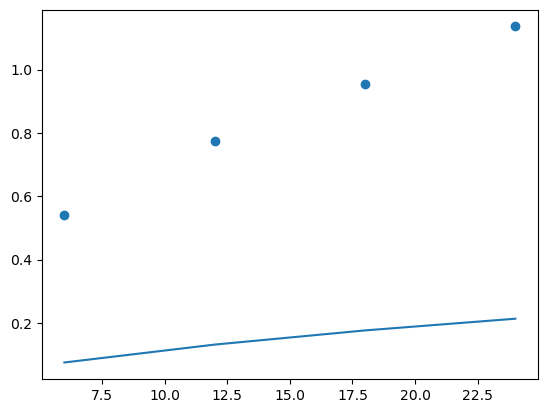

In [4]:
plt.plot(df.forecast_hour, df.std_global_U_20)
plt.scatter(df.forecast_hour, df.rmse_global_U_20)

In [36]:
idx = 3

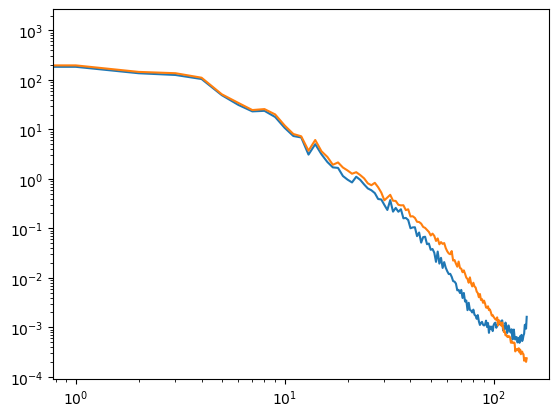

In [37]:
spectrum = df.zonal_spectrum_U_20.iloc[idx]
wavenums = np.arange(len(spectrum))
plt.loglog(wavenums, spectrum)
plt.loglog(wavenums, df.zonal_spectrum_U_20_truth.iloc[idx])

(0.0, 3.1522941761912704)

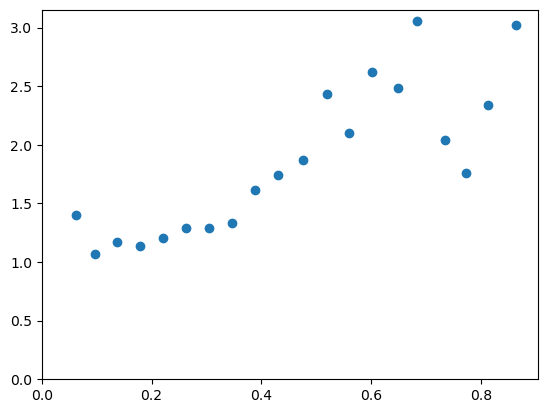

In [41]:
subdf = df.iloc[idx]
plt.scatter(subdf.spread_means_U_20, subdf.rmse_means_U_20)
plt.xlim(0)
plt.ylim(0)

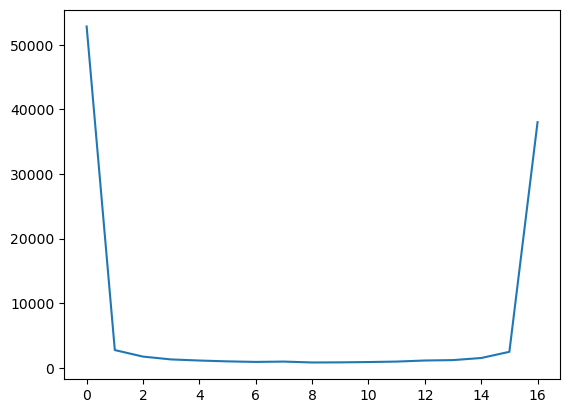

In [ ]:
### need to do .item when using masking!
subdf = df[df.forecast_hour == 24]
plt.plot(np.arange(len(subdf['rank_hist_U_20'].item())), subdf['rank_hist_U_20'].item())